In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = "2010-01-01"
end = "2020-12-31"

df = yf.download("AAPL", start, end)

[*********************100%%**********************]  1 of 1 completed


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.523270,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514465,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146637,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.360504,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.231888,96452100


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800


In [6]:
df = df.drop(["Date", "Adj Close"], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


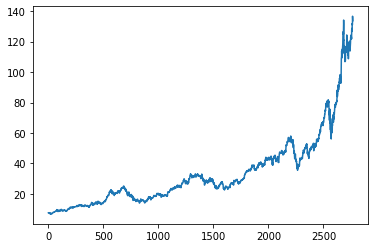

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2763,132.160004,132.429993,130.779999,130.960007,88223700
2764,131.320007,133.460007,131.100006,131.970001,54930100
2765,133.990005,137.339996,133.509995,136.690002,124486200
2766,138.050003,138.789993,134.339996,134.869995,121047300


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    118.000475
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
Name: Close, Length: 2768, dtype: float64

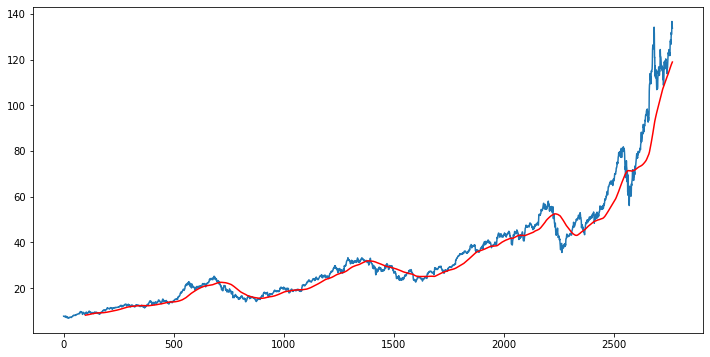

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, "r")

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64

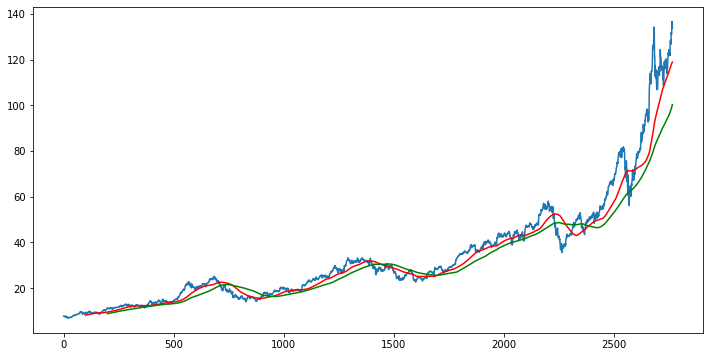

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, "r")
plt.plot(ma200, "g")

In [13]:
df.shape

(2768, 5)

In [14]:
data_training = pd.DataFrame(df["Close"][0 : int(len(df) * 0.70)])
data_test = pd.DataFrame(df["Close"][int(len(df) * 0.70) : int(len(df))])

print(data_training.shape)
print(data_test.shape)

(1937, 1)
(831, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_test.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2024-03-30 03:27:18.250632: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-30 03:27:18.250665: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [21]:
model = Sequential()
model.add(
    LSTM(
        units=50,
        activation="relu",
        return_sequences=True,
        input_shape=(x_train.shape[1], 1),
    )
)

model.add(Dropout(0.2))


model.add(
    LSTM(
        units=60,
        activation="relu",
        return_sequences=True,
    )
)

model.add(Dropout(0.3))


model.add(
    LSTM(
        units=80,
        activation="relu",
        return_sequences=True,
    )
)

model.add(Dropout(0.4))


model.add(LSTM(units=120, activation="relu"))

model.add(Dropout(0.5))


model.add(Dense(units=1))

2024-03-30 03:27:21.010444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-30 03:27:21.011118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-30 03:27:21.011268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-03-30 03:27:21.011373: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-03-30 03:27:21.011462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 21s 264ms/step - loss: 0.0434
Epoch 2/50
58/58 [==============================] - 17s 290ms/step - loss: 0.0089
Epoch 3/50
58/58 [==============================] - 14s 242ms/step - loss: 0.0078
Epoch 4/50
58/58 [==============================] - 18s 303ms/step - loss: 0.0077
Epoch 5/50
58/58 [==============================] - 17s 297ms/step - loss: 0.0076
Epoch 6/50
58/58 [==============================] - 19s 324ms/step - loss: 0.0068
Epoch 7/50
58/58 [==============================] - 18s 316ms/step - loss: 0.0062
Epoch 8/50
58/58 [==============================] - 18s 314ms/step - loss: 0.0051
Epoch 9/50
58/58 [==============================] - 18s 303ms/step - loss: 0.0056
Epoch 10/50
58/58 [==============================] - 21s 364ms/step - loss: 0.0054
Epoch 11/50
58/58 [==============================] - 24s 413ms/step - loss: 0.0051
Epoch 12/50
58/58 [==============================] - 26s 448ms/step - loss: 0.0053
Epoch 13/50
5

In [24]:
model.save("../models/keras_model.h5")

In [25]:
data_test.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [26]:
past_100_days = data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days, data_test], axis=0)

In [29]:
final_df

,Close
1837,35.567501
1838,35.910000
1839,36.132500
1840,35.919998
1841,35.947498
...,...
2763,130.960007
2764,131.970001
2765,136.690002
2766,134.869995


In [30]:
input_data = scaler.fit_transform(final_df)

In [31]:
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [32]:
input_data.shape

(931, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100 : i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(831, 100, 1)


In [35]:
print(y_test.shape)

(831,)


In [36]:
y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(831, 1)

In [38]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [39]:
y_predicted

array([[0.06184661],
       [0.06251591],
       [0.06312929],
       [0.06367992],
       [0.06416194],
       [0.06457171],
       [0.06490266],
       [0.06514387],
       [0.06528156],
       [0.065301  ],
       [0.06519514],
       [0.06496558],
       [0.06461841],
       [0.06416523],
       [0.06362027],
       [0.06300065],
       [0.06232247],
       [0.06160478],
       [0.06086679],
       [0.06012771],
       [0.05940479],
       [0.05871457],
       [0.05806911],
       [0.05747938],
       [0.05696157],
       [0.05653258],
       [0.05620432],
       [0.05597386],
       [0.05583066],
       [0.05575959],
       [0.05574596],
       [0.0557746 ],
       [0.05583346],
       [0.0559279 ],
       [0.05608042],
       [0.05632377],
       [0.05668327],
       [0.05717792],
       [0.05782959],
       [0.05865881],
       [0.05967963],
       [0.06089979],
       [0.0623166 ],
       [0.06391484],
       [0.06566885],
       [0.06754161],
       [0.06948772],
       [0.071

In [40]:
scaler.scale_

array([0.00988704])

In [41]:
scale_factor = 1 / 0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

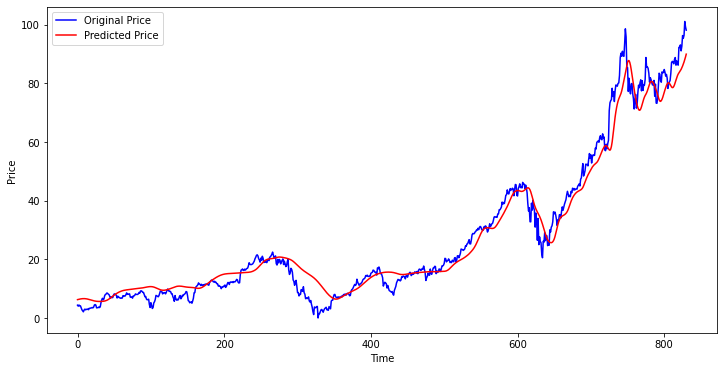

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, "b", label="Original Price")
plt.plot(y_predicted, "r", label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()